In [239]:
import folium
from folium import plugins
import pandas as pd
import random
import json
import pprint as pp
import seaborn as sns
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter  
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [205]:
p = 0.01
data = pd.read_csv('../s2/leveldb_res.txt', 
#                    nrows=10000, 
#                    skiprows=lambda i: i>0 and random.random() > p, header=None
                  )
drop_colums = [7,8,9,10,12]
data.drop(data.columns[drop_colums],axis=1,inplace=True)
data.columns = ['Taxi_ID','Longitude','Latitude','Timestamp','Device_ID','Velocity','Orientation','Taxi_Color',""]
# latitude, longitude
location = [22.618864, 114.027283]
m = folium.Map(location, zoom_start=11)

geo = r'../s2/nearest_edge.json'
#Let Folium determine the scale
roads = folium.GeoJson(
    geo,
    name='geojson'
)

data['Latitude'] = data['Latitude'].astype(float)
data['Longitude'] = data['Longitude'].astype(float)
heat_data = [[row['Latitude'],row['Longitude']] for index, row in data.iterrows()]
heat_map = plugins.HeatMap(heat_data, 
                           radius = 7,
                           min_opacity = 0.5,
                           blur=15,
                           #max_zoom=1
                          )
m.add_child(heat_map)
m.save('shenzhen.html')

m.add_child(roads)
m.save('shenzhen_with_roads.html')

In [206]:
# # latitude, longitude
# m = folium.Map(location, zoom_start=11)
# leveldb_res = pd.read_csv('./leveldb_res.txt')
# leveldb_res.head()
# drop_colums = [7,8,9,10,12,13]
# leveldb_res.drop(leveldb_res.columns[drop_colums],axis=1,inplace=True)
# leveldb_res.columns = ['Taxi_ID','Longitude','Latitude','Timestamp','Device_ID','Velocity','Orientation','Taxi_Color']
# leveldb_res.count()
# locations = leveldb_res[['Latitude', 'Longitude']]
# locationlist = locations.values.tolist()
# for point in range(0, len(locationlist)):
#     folium.Marker(
#         locationlist[point], 
#          popup=leveldb_res.iloc[[point]].Taxi_ID.item()
#     ).add_to(m)
# m.save('shenzhen.html')

In [207]:
# fast convert json to csv
with open(geo) as f:
    d = json.load(f)
df = json_normalize(d['features'])
df['road_num'] = pd.Categorical(df["properties.road_id"])
df['car_id'] = pd.Categorical(df["properties.carid"])
df['car_id'] = df.car_id.cat.codes
df['car_id_hex'] = df['car_id'].apply(lambda x: ("%04x" % x))
df['road_num'] = df.road_num.cat.codes
df['road_num'] = pd.Categorical(df['road_num'])
df['properties.point_id_int'] = df['properties.point_id'].apply(lambda x: int(x, 16))
df['properties.road_id_int'] = df['properties.road_id'].apply(lambda x: int(x, 16))
df['point_id_f4'] = df['properties.point_id'].apply(lambda x: x[4:])
df['point_id_new'] = df['point_id_f4'] + df['car_id_hex']
df['point_id_new_int'] = df['point_id_new'].apply(lambda x: int(x,16))
df['road_id_f4'] = df['properties.road_id'].apply(lambda x: x[4:])
df['road_id_new'] = df['road_id_f4'] + df['car_id_hex']
df['road_id_new_int'] = df['road_id_new'].apply(lambda x: int(x,16))
df
    

,geometry.coordinates,geometry.type,properties.carid,properties.point_id,properties.point_id_,properties.road_id,properties.road_id_,properties.target_point,type,road_num,car_id,car_id_hex,properties.point_id_int,properties.road_id_int,point_id_f4,point_id_new,point_id_new_int,road_id_f4,road_id_new,road_id_new_int
0,"[[114.04904174804688, 22.539485931396484], [11...",LineString,1489117,3403f3f8080776bf,3403f3f8080776bf0016b8dd,3403f3f808b3f4d7,3403f3f808b3f4d70016b8dd,"[114.048767, 22.539482]",Feature,0,576,0240,3748107561514530495,3748107561525834967,f3f8080776bf,f3f8080776bf0240,17579809973590753856,f3f808b3f4d7,f3f808b3f4d70240,17579810714440630848
1,"[[114.04904174804688, 22.539485931396484], [11...",LineString,1312701,3403f3f80808ada9,3403f3f80808ada9001407bd,3403f3f808b3f4d7,3403f3f808b3f4d7001407bd,"[114.048752, 22.539467]",Feature,0,44,002c,3748107561514610089,3748107561525834967,f3f80808ada9,f3f80808ada9002c,17579809978807025708,f3f808b3f4d7,f3f808b3f4d7002c,17579810714440630316
2,"[[114.04904174804688, 22.539485931396484], [11...",LineString,1471301,3403f3f80808ada9,3403f3f80808ada900167345,3403f3f808b3f4d7,3403f3f808b3f4d700167345,"[114.048752, 22.539467]",Feature,0,560,0230,3748107561514610089,3748107561525834967,f3f80808ada9,f3f80808ada90230,17579809978807026224,f3f808b3f4d7,f3f808b3f4d70230,17579810714440630832
3,"[[114.04904174804688, 22.539485931396484], [11...",LineString,1585062,3403f3f80809a2a3,3403f3f80809a2a300182fa6,3403f3f808b3f4d7,3403f3f808b3f4d700182fa6,"[114.048737, 22.539482]",Feature,0,1009,03f1,3748107561514672803,3748107561525834967,f3f80809a2a3,f3f80809a2a303f1,17579809982917051377,f3f808b3f4d7,f3f808b3f4d703f1,17579810714440631281
4,"[[114.04904174804688, 22.539485931396484], [11...",LineString,1524505,3403f3f8080f8d2d,3403f3f8080f8d2d00174319,3403f3f808b3f4d7,3403f3f808b3f4d700174319,"[114.048752, 22.53945]",Feature,0,783,030f,3748107561515060525,3748107561525834967,f3f8080f8d2d,f3f8080f8d2d030f,17579810008326800143,f3f808b3f4d7,f3f808b3f4d7030f,17579810714440631055
5,"[[114.0478515625, 22.539382934570312], [114.04...",LineString,1362832,3403f3f8081087af,3403f3f8081087af0014cb90,3403f3f808d237f9,3403f3f808d237f90014cb90,"[114.048752, 22.539433]",Feature,1,237,00ed,3748107561515124655,3748107561527818233,f3f8081087af,f3f8081087af00ed,17579810012529623277,f3f808d237f9,f3f808d237f900ed,17579810844415951085
6,"[[114.0478515625, 22.539382934570312], [114.04...",LineString,1652193,3403f3f80811362f,3403f3f80811362f001935e1,3403f3f808d237f9,3403f3f808d237f9001935e1,"[114.048737, 22.539427]",Feature,1,1263,04ef,3748107561515169327,3748107561527818233,f3f80811362f,f3f80811362f04ef,17579810015457248495,f3f808d237f9,f3f808d237f904ef,17579810844415952111
7,"[[114.0478515625, 22.539382934570312], [114.04...",LineString,1700102,3403f3f808136a3d,3403f3f808136a3d0019f106,3403f3f808d237f9,3403f3f808d237f90019f106,"[114.048714, 22.539433]",Feature,1,1435,059b,3748107561515313725,3748107561527818233,f3f808136a3d,f3f808136a3d059b,17579810024920515995,f3f808d237f9,f3f808d237f9059b,17579810844415952283
8,"[[114.0478515625, 22.539382934570312], [114.04...",LineString,1511452,3403f3f8081b0395,3403f3f8081b03950017101c,3403f3f808d237f9,3403f3f808d237f90017101c,"[114.048767, 22.539433]",Feature,1,653,028d,3748107561515811733,3748107561527818233,f3f8081b0395,f3f8081b0395028d,17579810057557967501,f3f808d237f9,f3f808d237f9028d,17579810844415951501
9,"[[114.0478515625, 22.539382934570312], [114.04...",LineString,1648248,3403f3f8081fdcc9,3403f3f8081fdcc900192678,3403f3f808d237f9,3403f3f808d237f900192678,"[114.048798, 22.5394]",Feature,1,1236,04d4,3748107561516129481,3748107561527818233,f3f8081fdcc9,f3f8081fdcc904d4,17579810078381901012,f3f808d237f9,f3f808d237f904d4,17579810844415952084


(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x1a4edc52b0>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x1a4ede0390>)

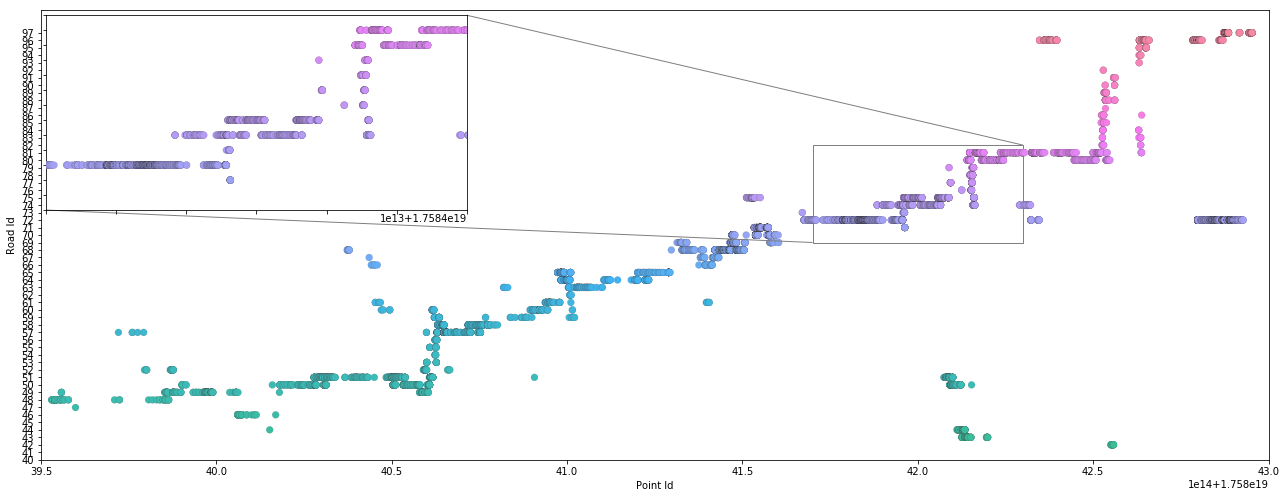

In [271]:
fig, ax = plt.subplots()
fig.set_size_inches(22,8.27)
ax = sns.stripplot(x="point_id_new_int", y="road_num", data=df,
                   dodge=True,jitter=False,
                   linewidth=0.1,
                   size = 7
                  )
start_ = 1.758e19
ax.set_xlim(start_+ 3.95e15, start_+ 4.3e15)
ax.set_ylim(40,100)
# ax.yaxis.set_major_locator(plt.NullLocator())
plt.xlabel('Point Id')
# Set y-axis label
plt.ylabel('Road Id')
axins = zoomed_inset_axes(ax, 2, loc=2) # zoom-factor: 2.5, location: upper-left
# axins.scatter(df['point_id_new_int'].tolist(), df['road_num'].tolist())
zoom_in = sns.stripplot(x="point_id_new_int", y="road_num", data=df,
                   dodge=True,jitter=False,
                   linewidth=0.1,
                   size = 7,
                   ax=axins
                  )
zoom_in.set(xlabel='', ylabel='')
axins.set_xlim(start_+ 4.17e15, start_+ 4.23e15)
axins.set_ylim(69,82)
plt.yticks(visible=False)
plt.xticks(visible=False)
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
# fig.savefig('example.png', dpi = 900)

(40, 100)

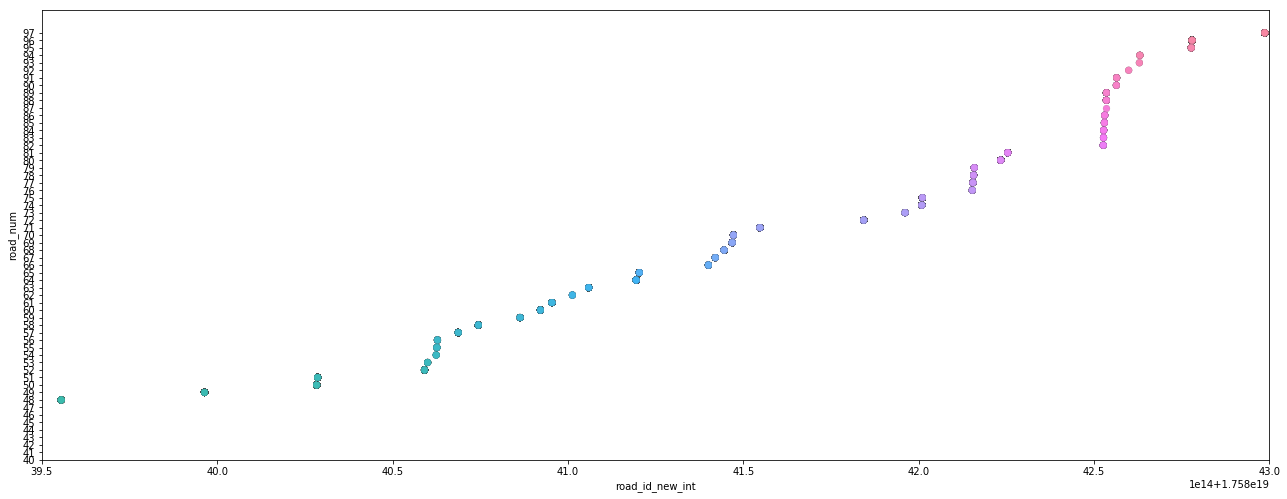

In [231]:
fig, ax = plt.subplots()
fig.set_size_inches(22,8.27)
ax = sns.stripplot(x="road_id_new_int", y="road_num", data=df,
                   dodge=True,jitter=False,
                   linewidth=0.1,
                   size = 7
                  )
start_ = 1.758e19
ax.set_xlim(start_+ 3.95e15, start_+ 4.3e15)
ax.set_ylim(40,100)

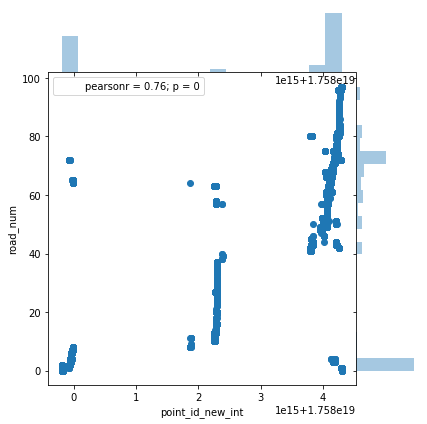

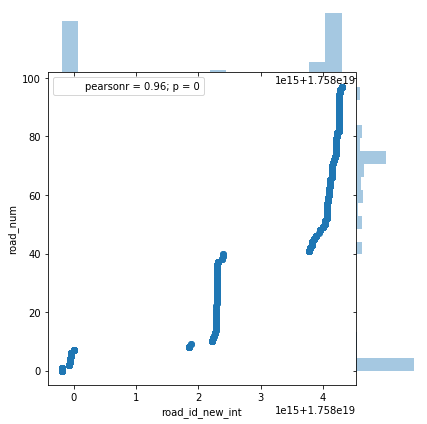

In [227]:
g = sns.jointplot("point_id_new_int", "road_num", data=df, space=0)
g = sns.jointplot("road_id_new_int", "road_num", data=df, space=0)